# Test Trilateration
Melakukan pengujian trilateration untuk menentukan perangkat yang hilang sinyal RSSI diterima oleh 4 titik referensi Beacon.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Data from beacons
beacon_a = {
    "mac-address": "xx:xx:xx:xx:xx:xx",
    "device_connected": 1,
    "logs": [{
        "mac-address": "xx:xx:xx:xx:xx:xx",
        "name": "HUAWEI Band 6-XXX",
        "RSSI": -84
    }]
}

beacon_b = {
    "mac-address": "xx:xx:xx:xx:xx:xx",
    "device_connected": 1,
    "logs": [{
        "mac-address": "xx:xx:xx:xx:xx:xx",
        "name": "HUAWEI Band 6-XXX",
        "RSSI": -82
    }]
}

beacon_c = {
    "mac-address": "xx:xx:xx:xx:xx:xx",
    "device_connected": 1,
    "logs": [{
        "mac-address": "xx:xx:xx:xx:xx:xx",
        "name": "HUAWEI Band 6-XXX",
        "RSSI": -71
    }]
}

beacon_d = {
    "mac-address": "xx:xx:xx:xx:xx:xx",
    "device_connected": 1,
    "logs": [{
        "mac-address": "xx:xx:xx:xx:xx:xx",
        "name": "HUAWEI Band 6-XXX",
        "RSSI": -82
    }]
}

# Reference points
A = (0, 0)
B = (2, 0)
C = (2, 1)
D = (0, 1)


## Function Distance based on RSSI

In [2]:
# Function to calculate distance from RSSI
def calculate_distance(rssi, tx_power=-85, n=2):
    return 10 ** ((tx_power - round(rssi, 2)) / (10 * n))

# Calculating distances
distance_a = calculate_distance(beacon_a['logs'][0]['RSSI'])
distance_b = calculate_distance(beacon_b['logs'][0]['RSSI'])
distance_c = calculate_distance(beacon_c['logs'][0]['RSSI'])
distance_d = calculate_distance(beacon_d['logs'][0]['RSSI'])

print("Distances from beacons:")
print(f"A: {distance_a} meters")
print(f"B: {distance_b} meters")
print(f"C: {distance_c} meters")
print(f"D: {distance_d} meters")

Distances from beacons:
A: 0.8912509381337456 meters
B: 0.7079457843841379 meters
C: 0.19952623149688797 meters
D: 0.7079457843841379 meters


## Function Trilateration

In [3]:
# Function to minimize (sum of squared differences)
def objective(params, A, B, C, D, d_a, d_b, d_c, d_d):
    x, y = params
    return ((x - A[0])**2 + (y - A[1])**2 - d_a**2)**2 + \
           ((x - B[0])**2 + (y - B[1])**2 - d_b**2)**2 + \
           ((x - C[0])**2 + (y - C[1])**2 - d_c**2)**2 + \
           ((x - D[0])**2 + (y - D[1])**2 - d_d**2)**2

# Initial guess (centroid of the beacons)
initial_guess = np.mean([A, B, C, D], axis=0)

# Optimize to find the best x, y
result = minimize(objective, initial_guess, args=(A, B, C, D, distance_a, distance_b, distance_c, distance_d))

x, y = result.x
device_position = (x, y)
print(f"Calculated Position: x = {x}, y = {y}")

Calculated Position: x = 1.0673516107580459, y = 0.5725126167554188


## Function Map Plotting

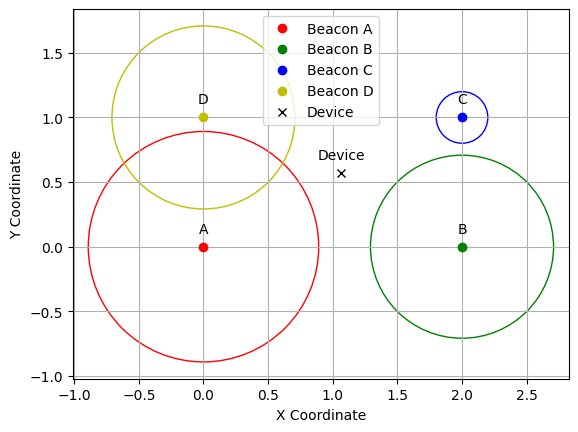

In [4]:
# Plot the reference points and calculated position
def plot_beacons_and_device(A, B, C, D, device_position):
    fig, ax = plt.subplots()
    ax.plot(*A, 'ro', label='Beacon A')
    ax.plot(*B, 'go', label='Beacon B')
    ax.plot(*C, 'bo', label='Beacon C')
    ax.plot(*D, 'yo', label='Beacon D')
    ax.plot(device_position[0], device_position[1], 'kx', label='Device')
    
    # Annotate the points
    ax.annotate('A', A, textcoords="offset points", xytext=(0,10), ha='center')
    ax.annotate('B', B, textcoords="offset points", xytext=(0,10), ha='center')
    ax.annotate('C', C, textcoords="offset points", xytext=(0,10), ha='center')
    ax.annotate('D', D, textcoords="offset points", xytext=(0,10), ha='center')
    ax.annotate('Device', device_position, textcoords="offset points", xytext=(0,10), ha='center')
    
    # Plot circles for the distances
    ax.add_patch(plt.Circle(A, distance_a, color='r', fill=False))
    ax.add_patch(plt.Circle(B, distance_b, color='g', fill=False))
    ax.add_patch(plt.Circle(C, distance_c, color='b', fill=False))
    ax.add_patch(plt.Circle(D, distance_d, color='y', fill=False))
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Plot the results
device_position = (float(x), float(y))
plot_beacons_and_device(A, B, C, D, device_position)